<a href="https://colab.research.google.com/github/hemanthmeruga/IEApp/blob/master/R8_Internal_Lab_Questions_Transfer_Learning_MNIST_Tweet_Sentiment_Analysis_HM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [0]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
% matplotlib inline
import vis

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K


Using TensorFlow backend.


## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [0]:
from keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape



11501568/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gt5 = x_train[y_train >= 5]
y_train_gt5 = y_train[y_train >= 5] - 5
x_test_gt5 = x_test[y_test >= 5]
y_test_gt5 = y_test[y_test >= 5] - 5

## 3. Print x_train, y_train, x_test and y_test for both the datasets

In [0]:
print(x_train_lt5, y_train_lt5, x_test_lt5, y_test_lt5)

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


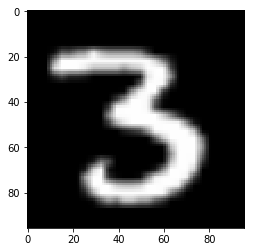

In [0]:
from skimage.transform import resize
def resize_image(image):
    return resize(image, (96,96,3), mode="symmetric")
plt.imshow(resize_image(x_train_lt5[9]));

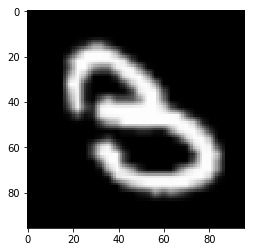

In [0]:
plt.imshow(resize_image(x_test_lt5[9]));

## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [0]:
x_train_conv = x_train_lt5.reshape(x_train_lt5.shape[0], 28, 28, 1)
x_test_conv = x_test_lt5.reshape(x_test_lt5.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

## 5. Normalize x_train and x_test by dividing it by 255

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
y_train_class = keras.utils.to_categorical(y_train_lt5, 5)
y_test_class = keras.utils.to_categorical(y_test_lt5, 5)


## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [0]:
cnn_1 = Sequential()
cnn_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), name='conv_1'))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), name='conv_2'))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_1.add(Dropout(0.25))

## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [0]:
cnn_1.add(Flatten())
cnn_1.add(Dense(128, activation='relu', name='dense_1'))
cnn_1.add(Dense(5, activation='softmax', name='dense_2'))

## 9. Print the training and test accuracy

In [0]:
cnn_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

In [0]:
cnn_1.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [0]:
# fits the model on batches with real-time data augmentation:
model_1 = cnn_1.fit(x_train_conv, y_train_class, 
                     validation_data=(x_test_conv, y_test_class),        
                     batch_size=512, epochs=5)
            


W0624 10:26:49.241417 140368799061888 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 8s 273us/step - loss: 0.3719 - acc: 0.8925 - val_loss: 0.0606 - val_acc: 0.9829
Epoch 2/5
30596/30596 [==============================] - 1s 21us/step - loss: 0.0688 - acc: 0.9788 - val_loss: 0.0244 - val_acc: 0.9932
Epoch 3/5
30596/30596 [==============================] - 1s 21us/step - loss: 0.0411 - acc: 0.9875 - val_loss: 0.0160 - val_acc: 0.9957
Epoch 4/5
30596/30596 [==============================] - 1s 21us/step - loss: 0.0327 - acc: 0.9898 - val_loss: 0.0127 - val_acc: 0.9969
Epoch 5/5
30596/30596 [==============================] - 1s 20us/step - loss: 0.0262 - acc: 0.9918 - val_loss: 0.0126 - val_acc: 0.9965


In [0]:
score = cnn_1.evaluate(x_test_conv, y_test_class)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5139/5139 [==============================] - 0s 56us/step
('Test loss:', 0.012636372597585826)
('Test accuracy:', 0.9964973730297724)


## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in cnn_1.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in cnn.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
True
max_pooling2d_1
True
conv_2
True
max_pooling2d_2
True
dropout_1
True
flatten_1
True
dense_1
True
dense_2
True


## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

In [0]:


x_train_conv = x_train_gt5.reshape(x_train_gt5.shape[0], 28, 28, 1)
x_test_conv = x_test_gt5.reshape(x_test_gt5.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

y_train_class = keras.utils.to_categorical(y_train_gt5, 5)
y_test_class = keras.utils.to_categorical(y_test_gt5, 5)

In [0]:
cnn_1.fit(x_train_conv, y_train_class, 
                     validation_data=(x_test_conv, y_test_class),        
                     batch_size=512, epochs=5)

Train on 29404 samples, validate on 4861 samples
Epoch 1/5
 6656/29404 [=====>........................] - ETA: 0s - loss: 1.3038 - acc: 0.6704

/usr/local/lib/python2.7/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


29404/29404 [==============================] - 1s 25us/step - loss: 0.4386 - acc: 0.8780 - val_loss: 0.0900 - val_acc: 0.9726
Epoch 2/5
29404/29404 [==============================] - 1s 21us/step - loss: 0.0937 - acc: 0.9691 - val_loss: 0.0569 - val_acc: 0.9815
Epoch 3/5
29404/29404 [==============================] - 1s 20us/step - loss: 0.0656 - acc: 0.9786 - val_loss: 0.0440 - val_acc: 0.9864
Epoch 4/5
29404/29404 [==============================] - 1s 20us/step - loss: 0.0551 - acc: 0.9825 - val_loss: 0.0364 - val_acc: 0.9877
Epoch 5/5
29404/29404 [==============================] - 1s 20us/step - loss: 0.0470 - acc: 0.9851 - val_loss: 0.0328 - val_acc: 0.9877


## 12. Print the accuracy for classification of digits 5 to 9

In [0]:
score = cnn_1.evaluate(x_test_conv, y_test_class)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4861/4861 [==============================] - 0s 54us/step
('Test loss:', 0.032829401966332286)
('Test accuracy:', 0.9876568607282452)


## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [0]:
import pandas as pd 

from google.colab import drive
drive.mount('/content/gdrive')

t_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Notebooks/tweets.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
t_df.dropna()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion


In [0]:
t_df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [0]:
def preprocess(text):
    try:
        return text.decode('ascii')
    except Exception as e:
        return ""

In [0]:
t_df['text'] = [preprocess(text) for text in t_df.tweet_text]

In [0]:
t_df.shape


(9093, 4)

### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [0]:
t_df_filtered =  t_df[(t_df['is_there_an_emotion_directed_at_a_brand_or_product']=='Positive emotion') | (t_df['is_there_an_emotion_directed_at_a_brand_or_product']=='Negative emotion')]

In [0]:
t_df_filtered.shape

(3548, 4)

In [0]:
t_df_filtered.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 


train_data_features = vectorizer.fit_transform(df_clean.text)
train_data_features = train_data_features.toarray()

# train_data_features = train_data_features.toarray()

In [0]:
train_data_features.shape

(3548, 5000)

In [0]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 17. Find number of different words in vocabulary

In [0]:
vocab = vectorizer.get_feature_names()
print vocab

[u'000', u'02', u'03', u'0310apple', u'08', u'10', u'100', u'100s', u'100tc', u'101', u'106', u'10am', u'10k', u'10mins', u'10pm', u'10x', u'11', u'11ntc', u'11th', u'12', u'120', u'12b', u'12th', u'13', u'130', u'14', u'1406', u'1413', u'1415', u'15', u'150', u'1500', u'150m', u'157', u'15am', u'15k', u'15slides', u'16162', u'169', u'16gb', u'16mins', u'17', u'188', u'1986', u'1990style', u'1991', u'1k', u'1m', u'1pm', u'1st', u'20', u'200', u'2010', u'2011', u'2012', u'20s', u'21', u'210', u'22', u'23', u'24', u'25', u'250k', u'25th', u'2am', u'2day', u'2honor', u'2moro', u'2nd', u'2nite', u'2s', u'2yrs', u'30', u'300', u'3000', u'30a', u'30am', u'30p', u'30pm', u'310409h2011', u'32', u'32gb', u'35', u'36', u'360', u'37', u'3blks', u'3d', u'3g', u'3gs', u'3k', u'3rd', u'3x', u'40', u'400', u'40min', u'41', u'437', u'45', u'45am', u'47', u'48', u'4am', u'4android', u'4chan', u'4g', u'4nqv92l', u'4sq', u'4sq3', u'4square', u'50', u'54', u'55', u'58', u'59', u'59pm', u'5hrs', u'5pm', u'

#### Tip: To see all available functions for an Object use dir

### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [0]:
t_df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
t_df_filtered.shape

(3548, 4)

### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

In [0]:
dict = {'Positive emotion' : 1, 'Negative emotion' : 0}

In [0]:
t_df_filtered['Review']=t_df_filtered['is_there_an_emotion_directed_at_a_brand_or_product'].map(dict)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
len(t_df_filtered['text'])

3548

### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [0]:
X = train_data_features
y = t_df_filtered['Review']

In [0]:
X.shape

(3548, 5000)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)


In [0]:
X_test.shape

(710, 5000)

In [0]:
from sklearn.naive_bayes import GaussianNB

## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [0]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_predictTest=nbModel.predict(X_test)
y_predictTest

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,

In [0]:
import numpy as np
temp_ds=np.where(nbModel.predict_proba(X_test)[:,1]> .35,1,0)

In [0]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,roc_curve,auc
from sklearn import metrics

recall_score(y_test,temp_ds,average="micro")

0.7591549295774648

In [0]:
precision_score(y_test,temp_ds,average="micro")

0.7591549295774648

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# Fit the model on 30%
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_predict = model_lr.predict(X_test)
model_lr_score = model_lr.score(X_test, y_test)
print(model_lr_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.8492957746478873
[[ 39  82]
 [ 25 564]]


## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
def tokenize_test(vect, X, y):
    from sklearn.naive_bayes import MultinomialNB
    x_train_dtm = vect.fit_transform(X)
    #from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_train_dtm, y, test_size=.2, random_state=1)
    print('Features: ', x_train_dtm.shape[1])
    #x_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred_class = nb.predict(X_test)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [0]:
v_ngram = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             ngram_range = (1,2), \
                             max_features = 5000) 


tokenize_test(v_ngram,t_df_filtered.text, y)

('Features: ', 5000)
('Accuracy: ', 0.8140845070422535)


### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [0]:
v_ngram = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             ngram_range = (1,2), \
                             max_features = 5000) 


tokenize_test(v_ngram,t_df_filtered.text, y)

('Features: ', 5000)
('Accuracy: ', 0.8140845070422535)


### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [0]:
v_ngram = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             #ngram_range = (1,2), \
                             max_features = 300) 


tokenize_test(v_ngram,t_df_filtered.text, y)

('Features: ', 300)
('Accuracy: ', 0.8042253521126761)


### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [0]:
v_ngram = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             ngram_range = (1,2), \
                             max_features = 15000) 


tokenize_test(v_ngram,t_df_filtered.text, y)

('Features: ', 15000)
('Accuracy: ', 0.852112676056338)


### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [0]:
v_ngram = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             ngram_range = (1,2), \
                             min_df=2, \
                             max_features = 15000) 


tokenize_test(v_ngram,t_df_filtered.text, y)

('Features: ', 11012)
('Accuracy: ', 0.8394366197183099)
